In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 14})
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
x_axis= [1, 2, 4, 8, 10, 12, 16, 20, 26, 30, 36, 42, 48, 54, 60, 64]
ms = 1
n_tasks = 512
target = [(ms * n_tasks)/i for i in x_axis]
xticks = [1]
for i in range(5, x_axis[-1], 5):
    xticks.append(i)
if xticks[-1] != x_axis[-1]:
    xticks.append(x_axis[-1])

In [4]:
processes = [
    [100, [537.559, 272.794, 142.295, 82.82, 73.021, 68.824, 68.447, 70.837, 78.005, 91.14, 110.957, 135.904, 160.978, 192.733, 247.993, 272.468]],
    [512, [538.64, 273.144, 144.131, 82.38, 72.781, 70.083, 68.001, 68.897, 82.848, 86.217, 108.245, 139.626, 177.141, 214.413, 226.889, 262.393]],
    [1024, [540.497, 274.001, 144.399, 83.651, 74.786, 68.61, 65.81, 71.685, 80.669, 95.284, 119.37, 138.078, 183.688, 198.132, 231.323, 255.719]],
    [8192, [559.879, 285.89, 149.978, 86.929, 77.343, 70.439, 75.913, 97.846, 103.207, 115.179, 144.923, 167.5, 193.009, 245.742, 275.878, 321.019]],
    [32768, [598.684, 306.691, 163.887, 111.114, 120.367, 123.072, 133.754, 139.63, 168.79, 173.544, 199.161, 245.838, 260.798, 330.384, 346.894, 404.966]],
    [524288, [1841.576, 1459.277, 1494.97, 1445.574, 1461.261, 1543.306, 1532.8049999999998, 1522.99, 1535.3319999999999, 1571.917, 1406.268, 1637.549, 1615.5819999999999, 1610.9450000000002, 1717.341, 1750.266]],
    [1048576, [3497.133, 3046.094, 3196.363, 3238.752, 3211.401, 3155.074, 3071.826, 3041.287, 3122.223, 3228.328, 3152.409, 3160.909, 3296.435, 3415.2690000000002, 3406.904, 3390.263]],
]

In [5]:
subinterpreters = [
    [100, [552.442, 295.709, 169.405, 120.23, 109.048, 106.828, 107.493, 123.726, 140.465, 157.048, 178.793, 191.656, 199.628, 219.587, 243.977, 246.755]],
    [512, [552.764, 295.481, 180.041, 122.549, 110.546, 112.449, 107.945, 123.469, 144.76, 158.216, 181.178, 190.356, 199.943, 215.635, 228.314, 252.452]],
    [1024, [553.835, 295.976, 180.378, 121.768, 110.648, 105.709, 109.609, 120.323, 145.451, 163.199, 186.641, 203.657, 211.052, 240.091, 241.446, 251.269]],
    [8192, [562.491, 300.796, 183.462, 122.455, 113.693, 105.265, 108.66, 124.912, 143.786, 170.219, 205.048, 238.339, 262.873, 290.356, 313.142, 334.707]],
    [32768, [585.887, 315.073, 192.064, 130.25, 120.917, 117.685, 137.405, 149.358, 177.183, 198.489, 233.15, 262.074, 282.876, 323.423, 353.112, 341.213]],
    [524288, [1012.099, 568.623, 560.356, 574.789, 605.907, 582.319, 609.796, 640.514, 662.811, 696.902, 702.981, 757.197, 787.515, 844.915, 854.872, 913.334]],
    [1048576, [1560.1779999999999, 1010.13, 1015.95, 1028.251, 1001.337, 1044.851, 1103.749, 1107.13, 1152.8600000000001, 1154.171, 1204.435, 1239.087, 1244.27, 1297.217, 1359.943, 1368.964]],
]

In [6]:
#colors = ["#94E0F0", "#70d6eb", "#4CCCE6", "#29C2E0", "#1CA8C4", "#178AA1", "#126B7D", "#0D4C59", "#F25A02", "#F25A02"]
colors = ["#94E0F0", "#4CCCE6", "#1CA8C4", "#126B7D", "#051F24", "#FBA637", "#cc4c02"]
linewidth = 2
style = '--'

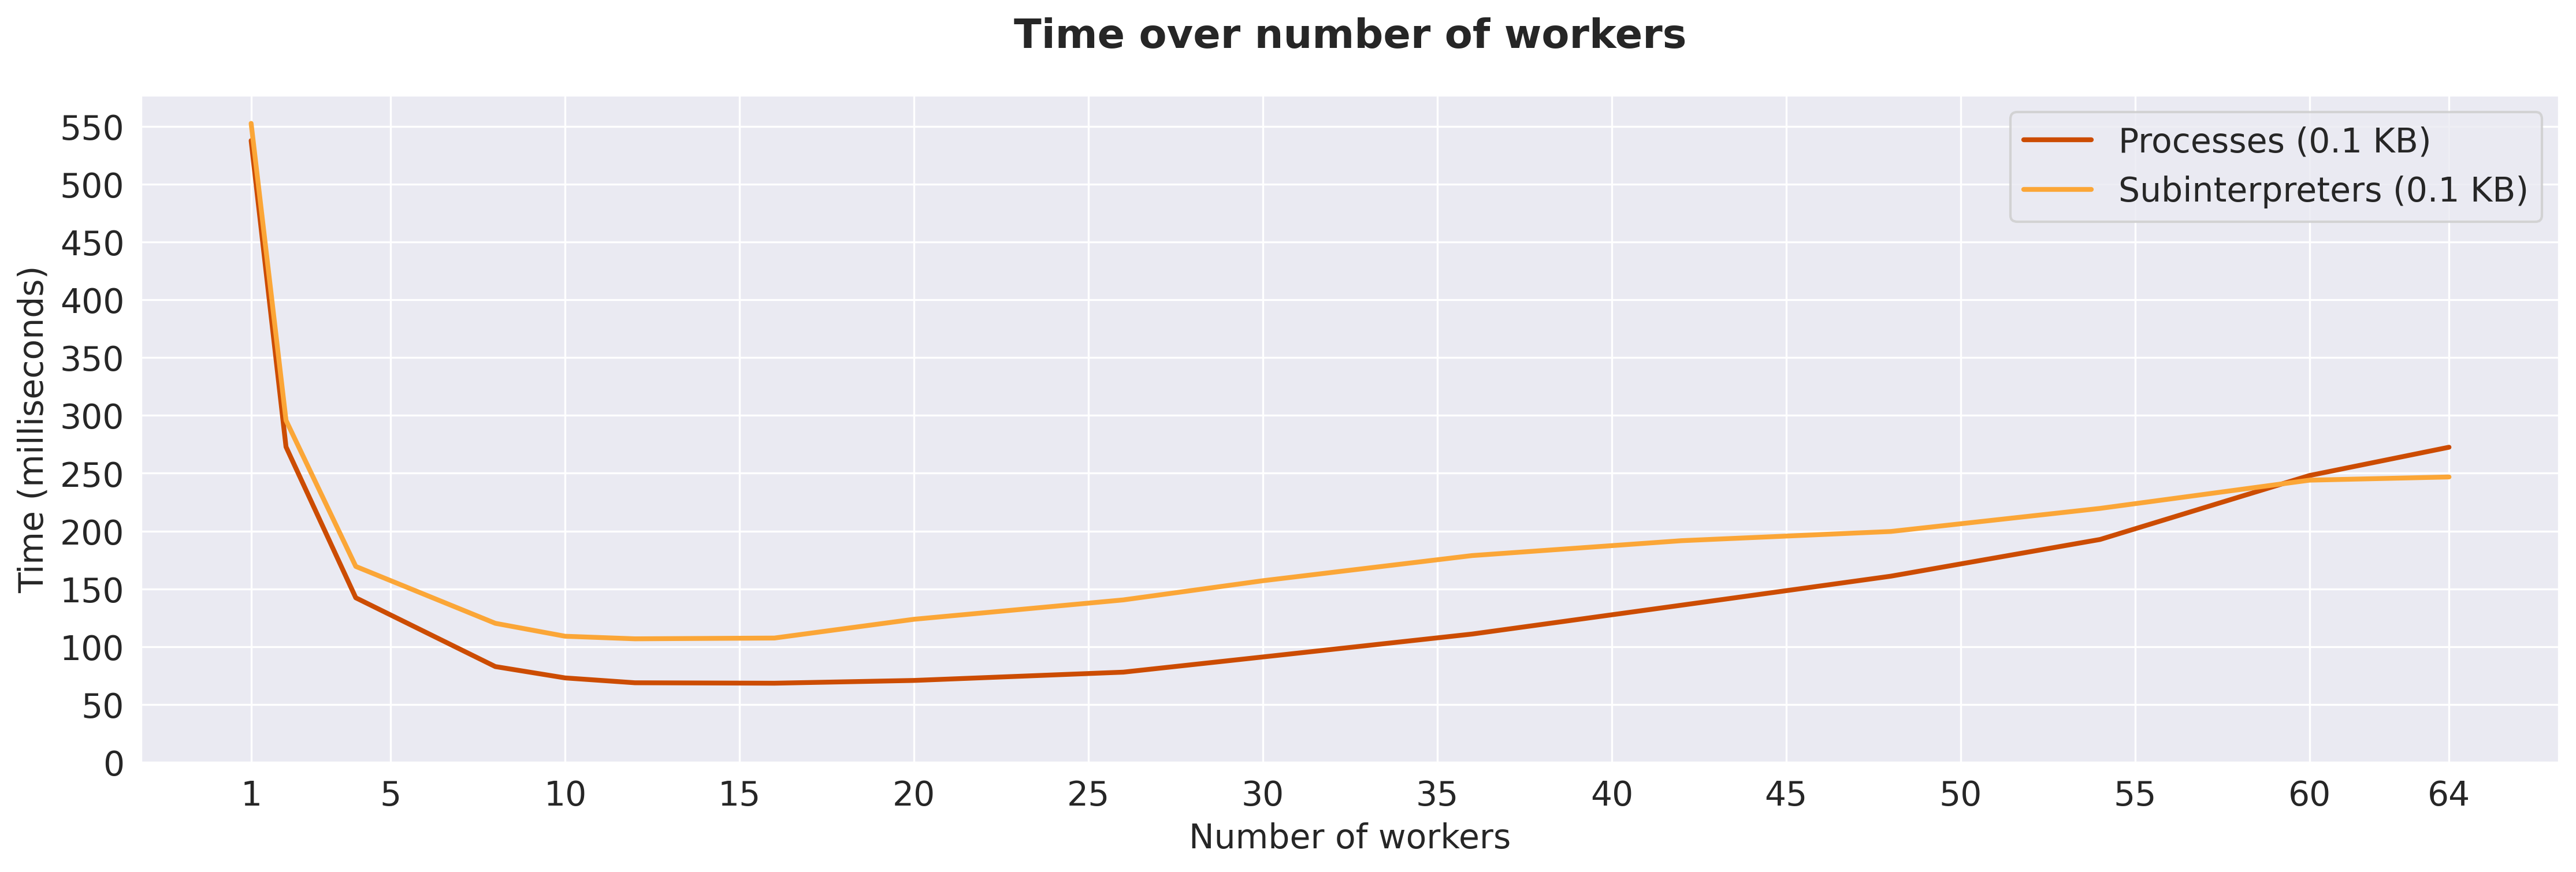

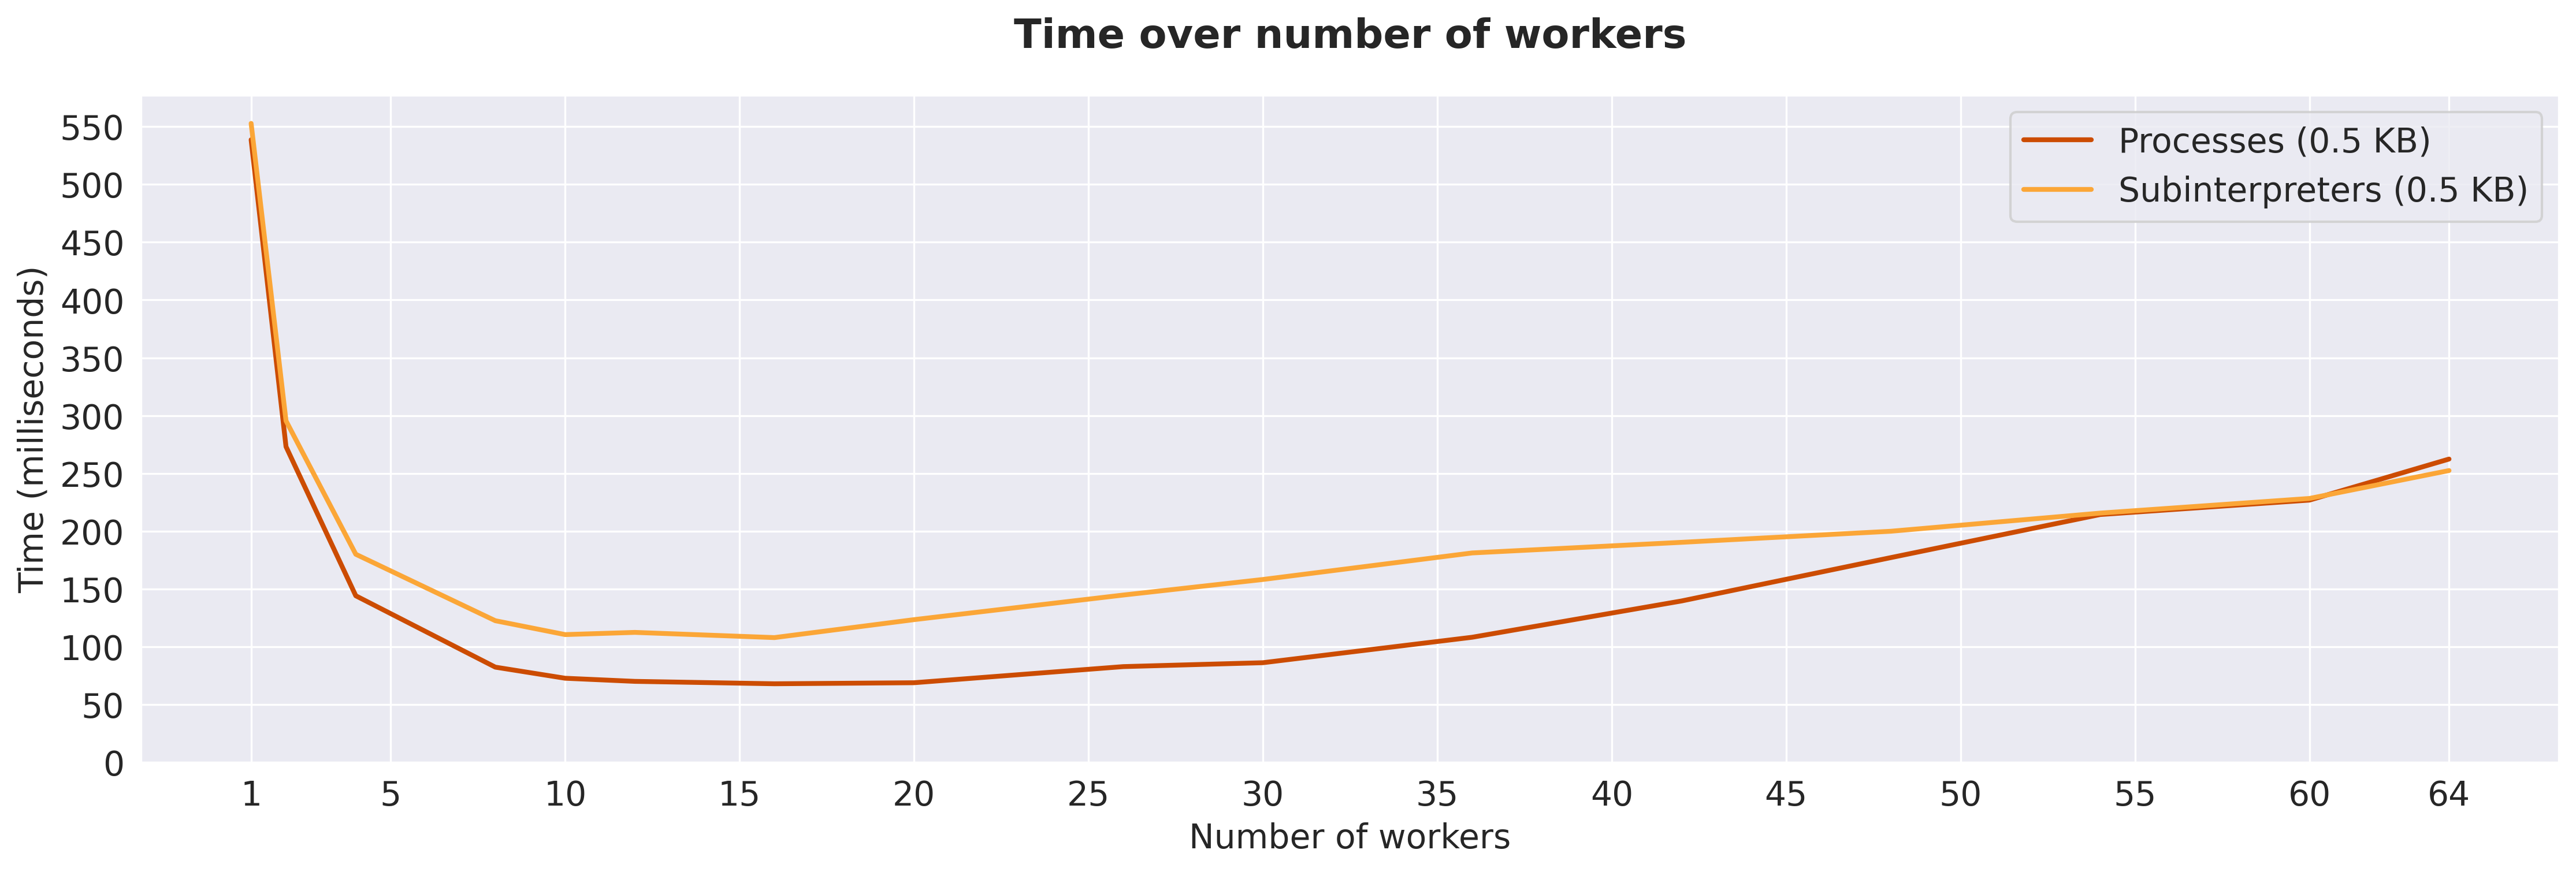

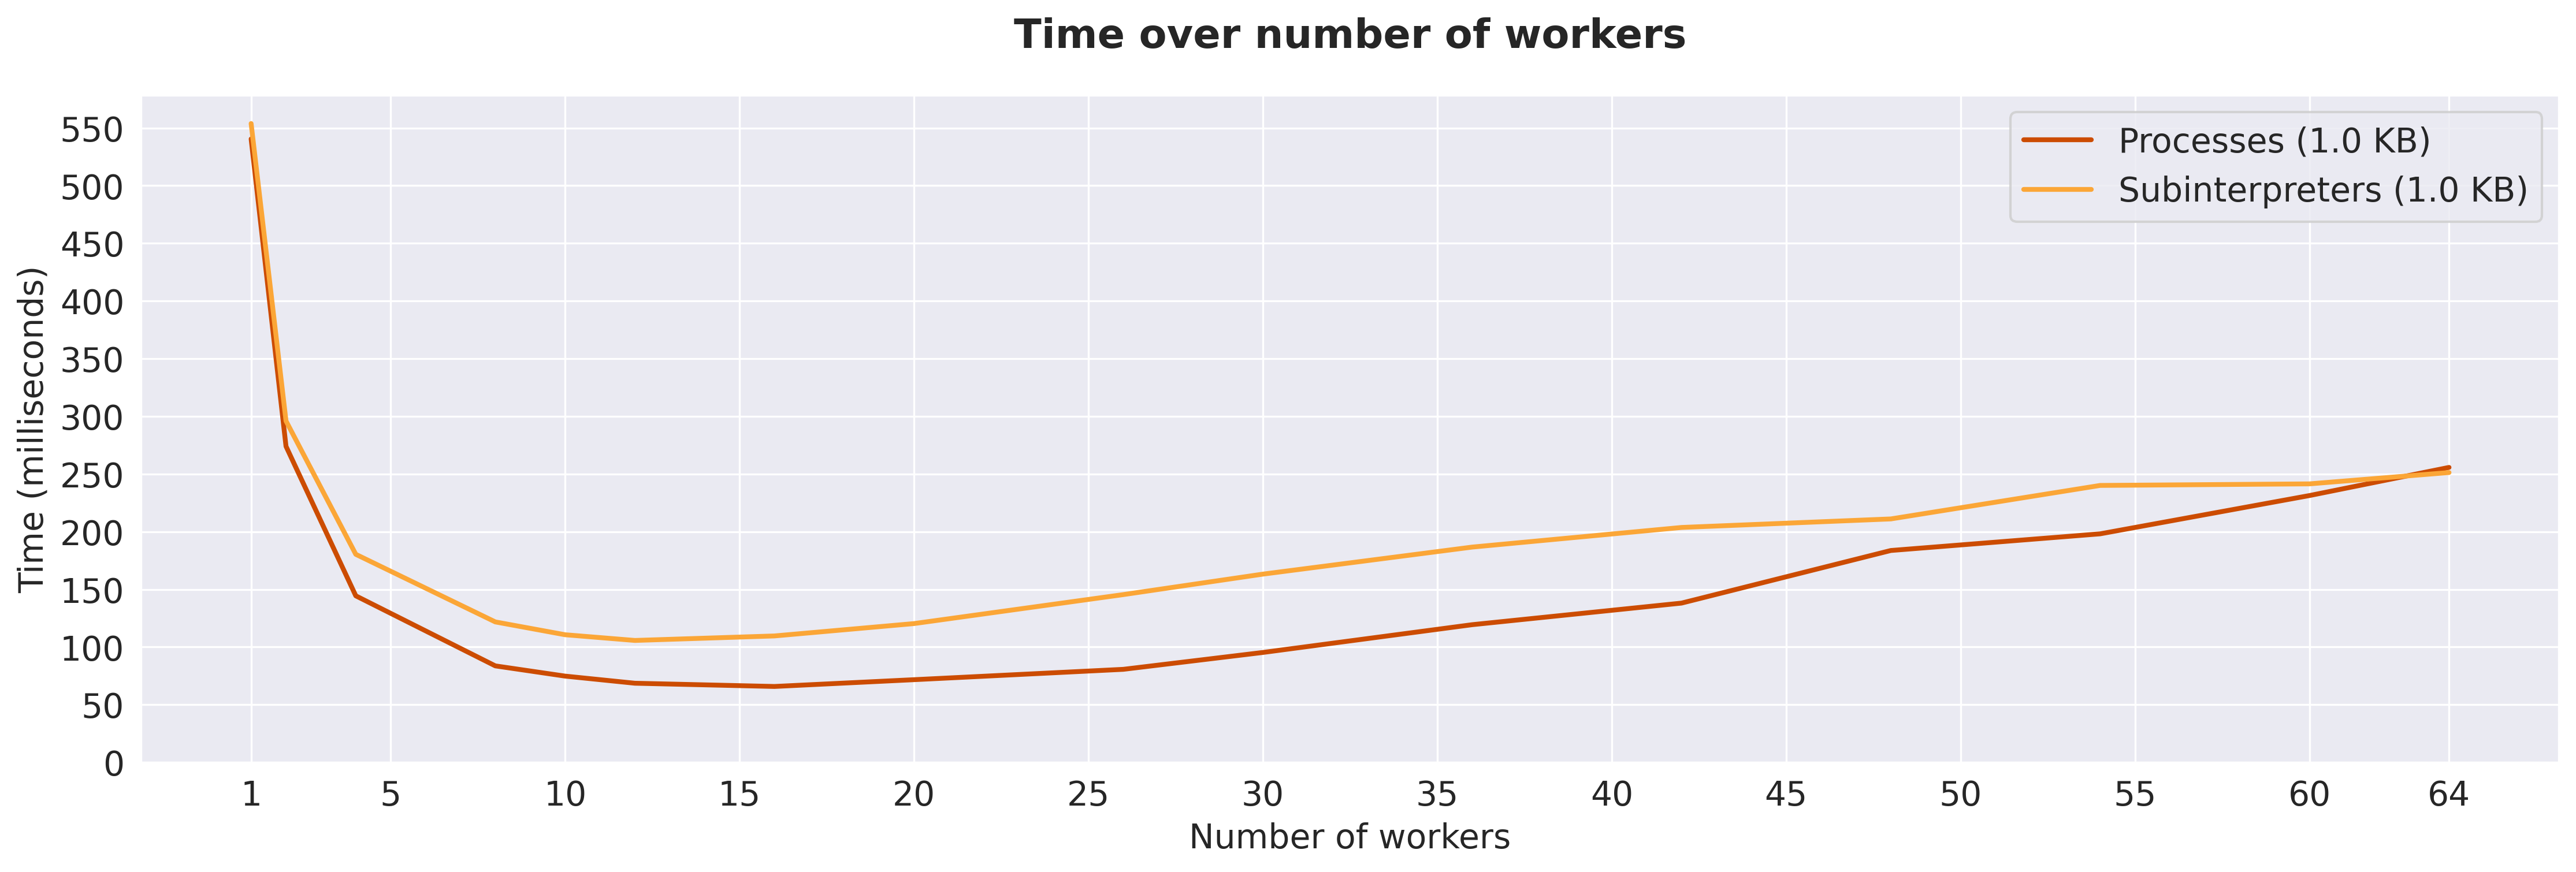

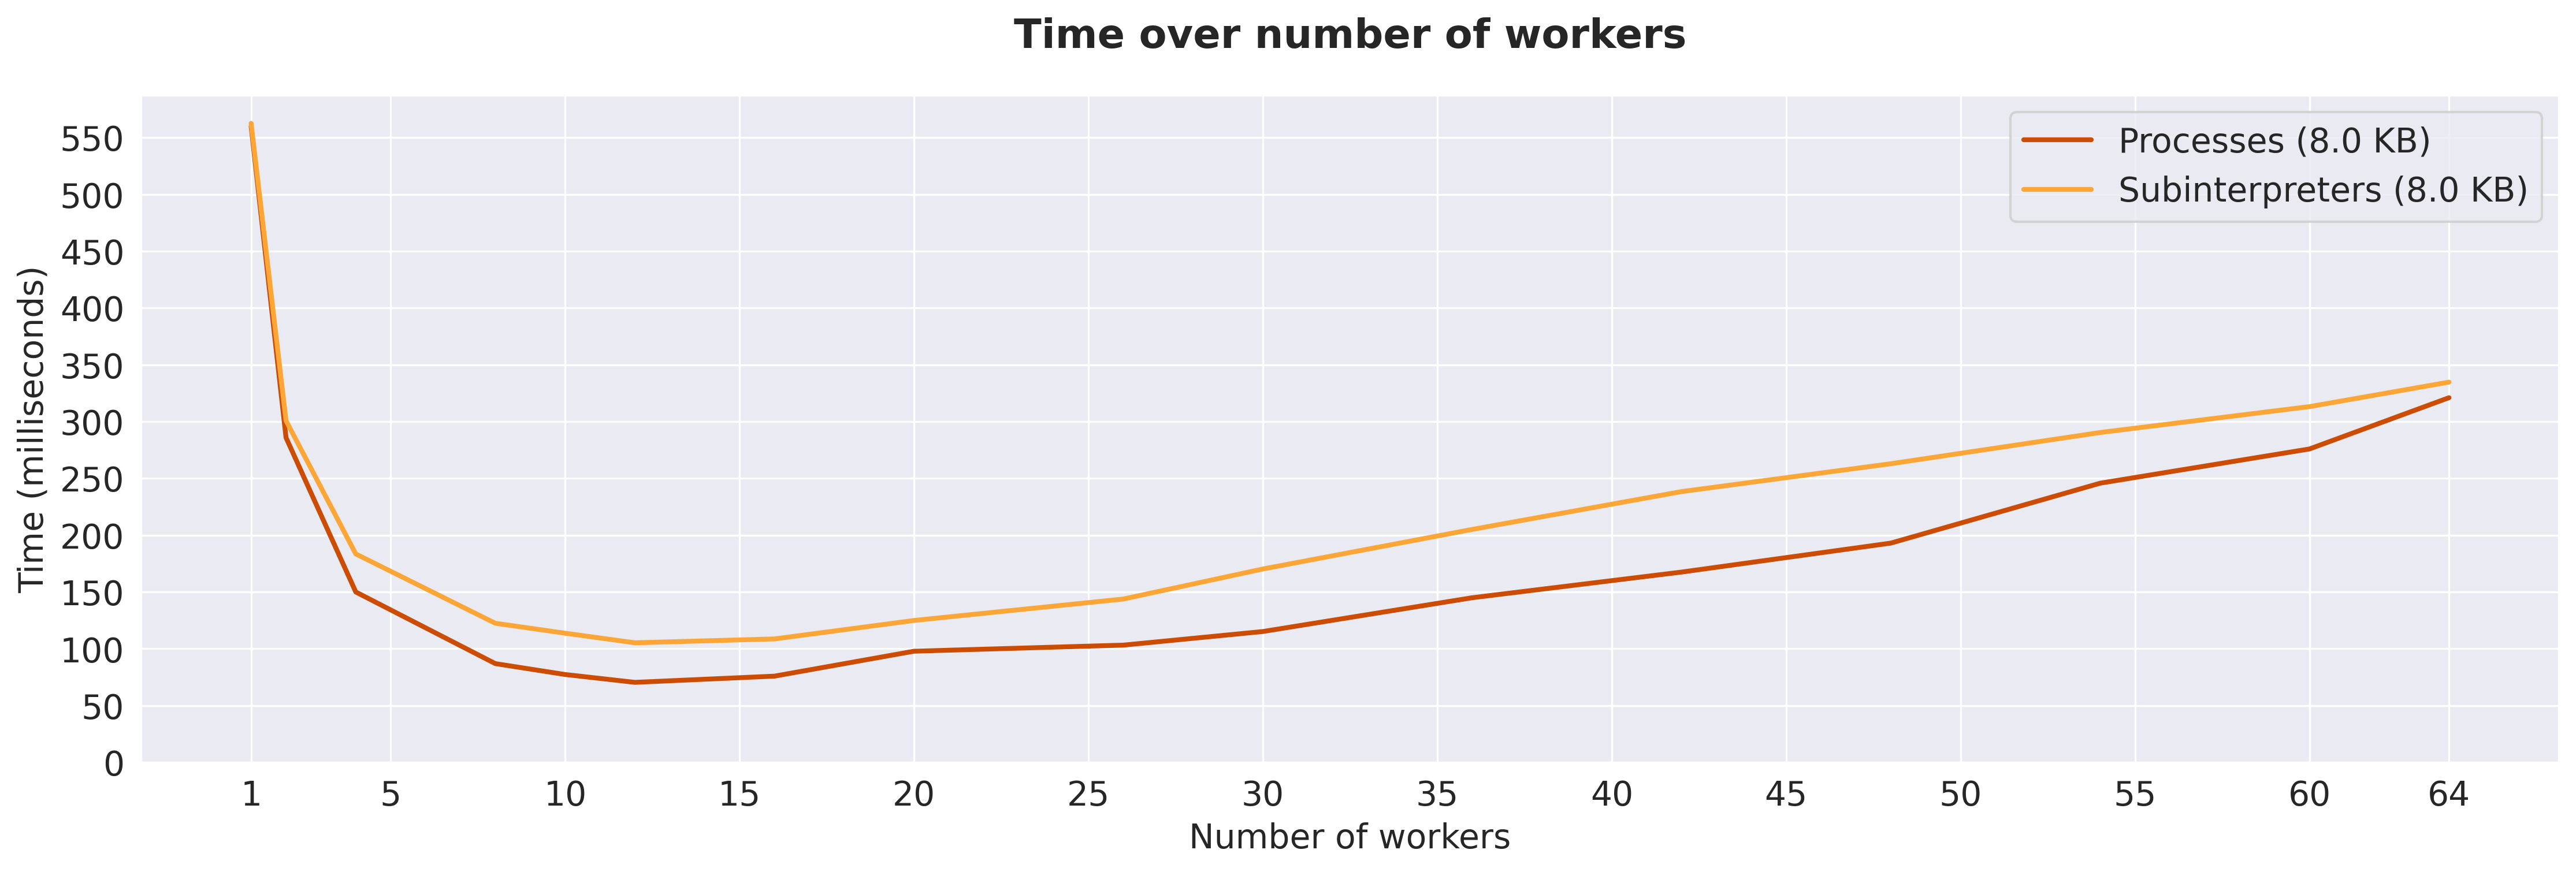

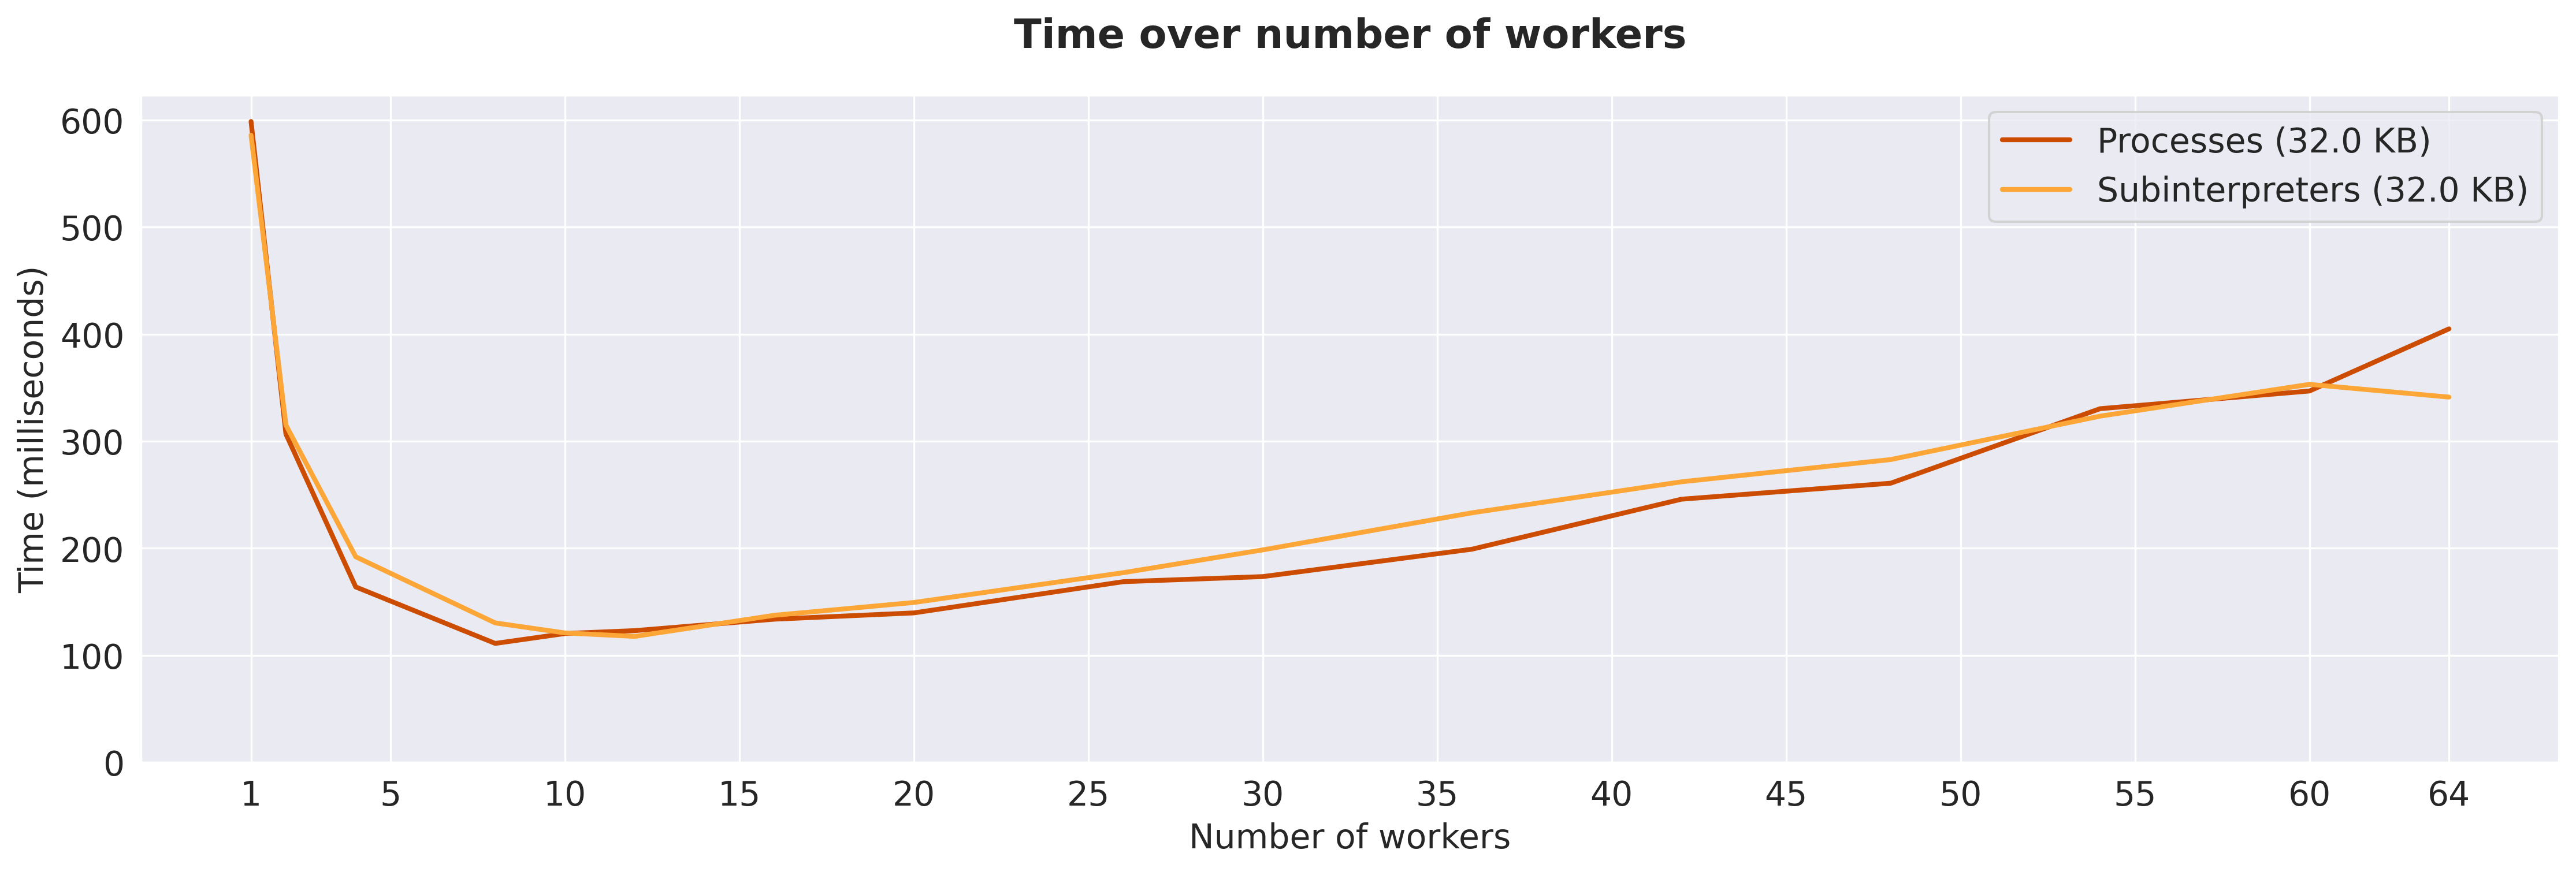

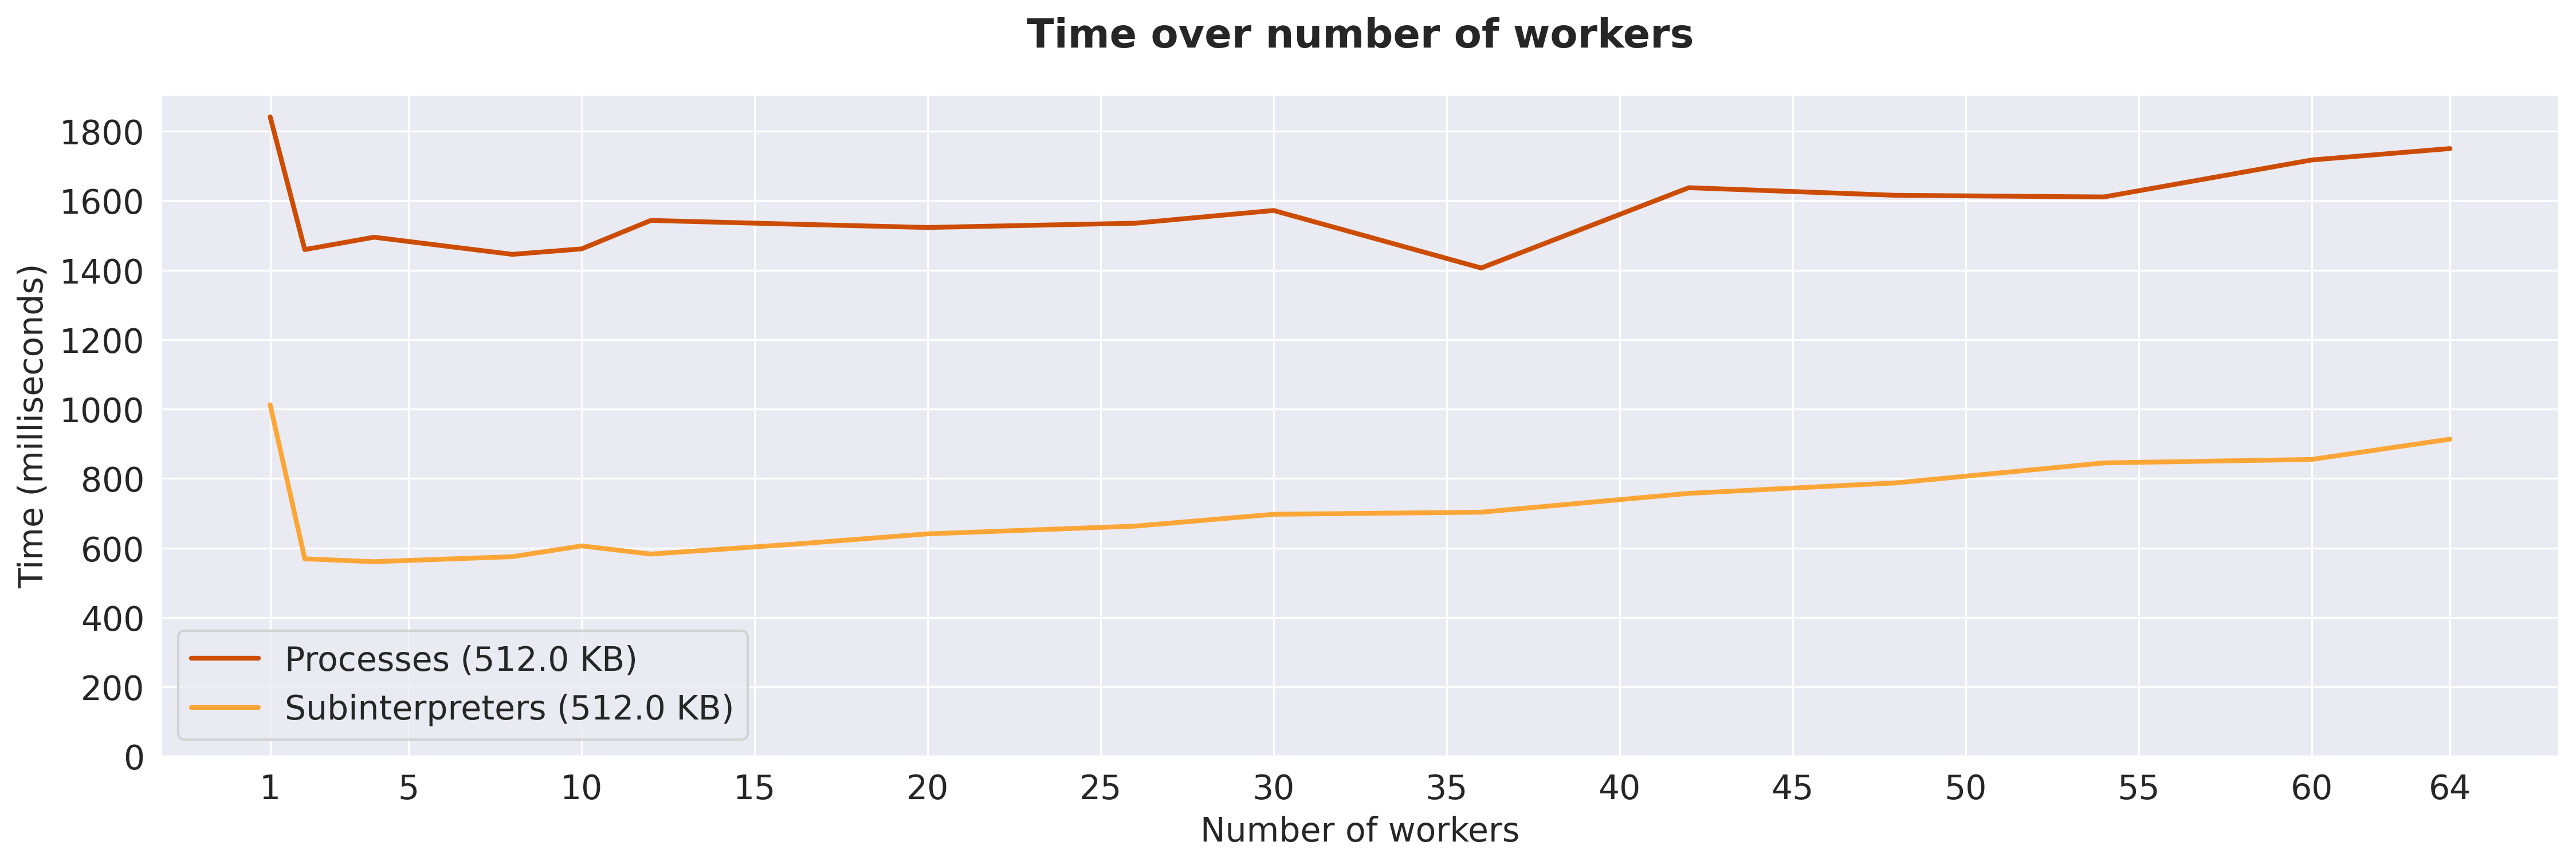

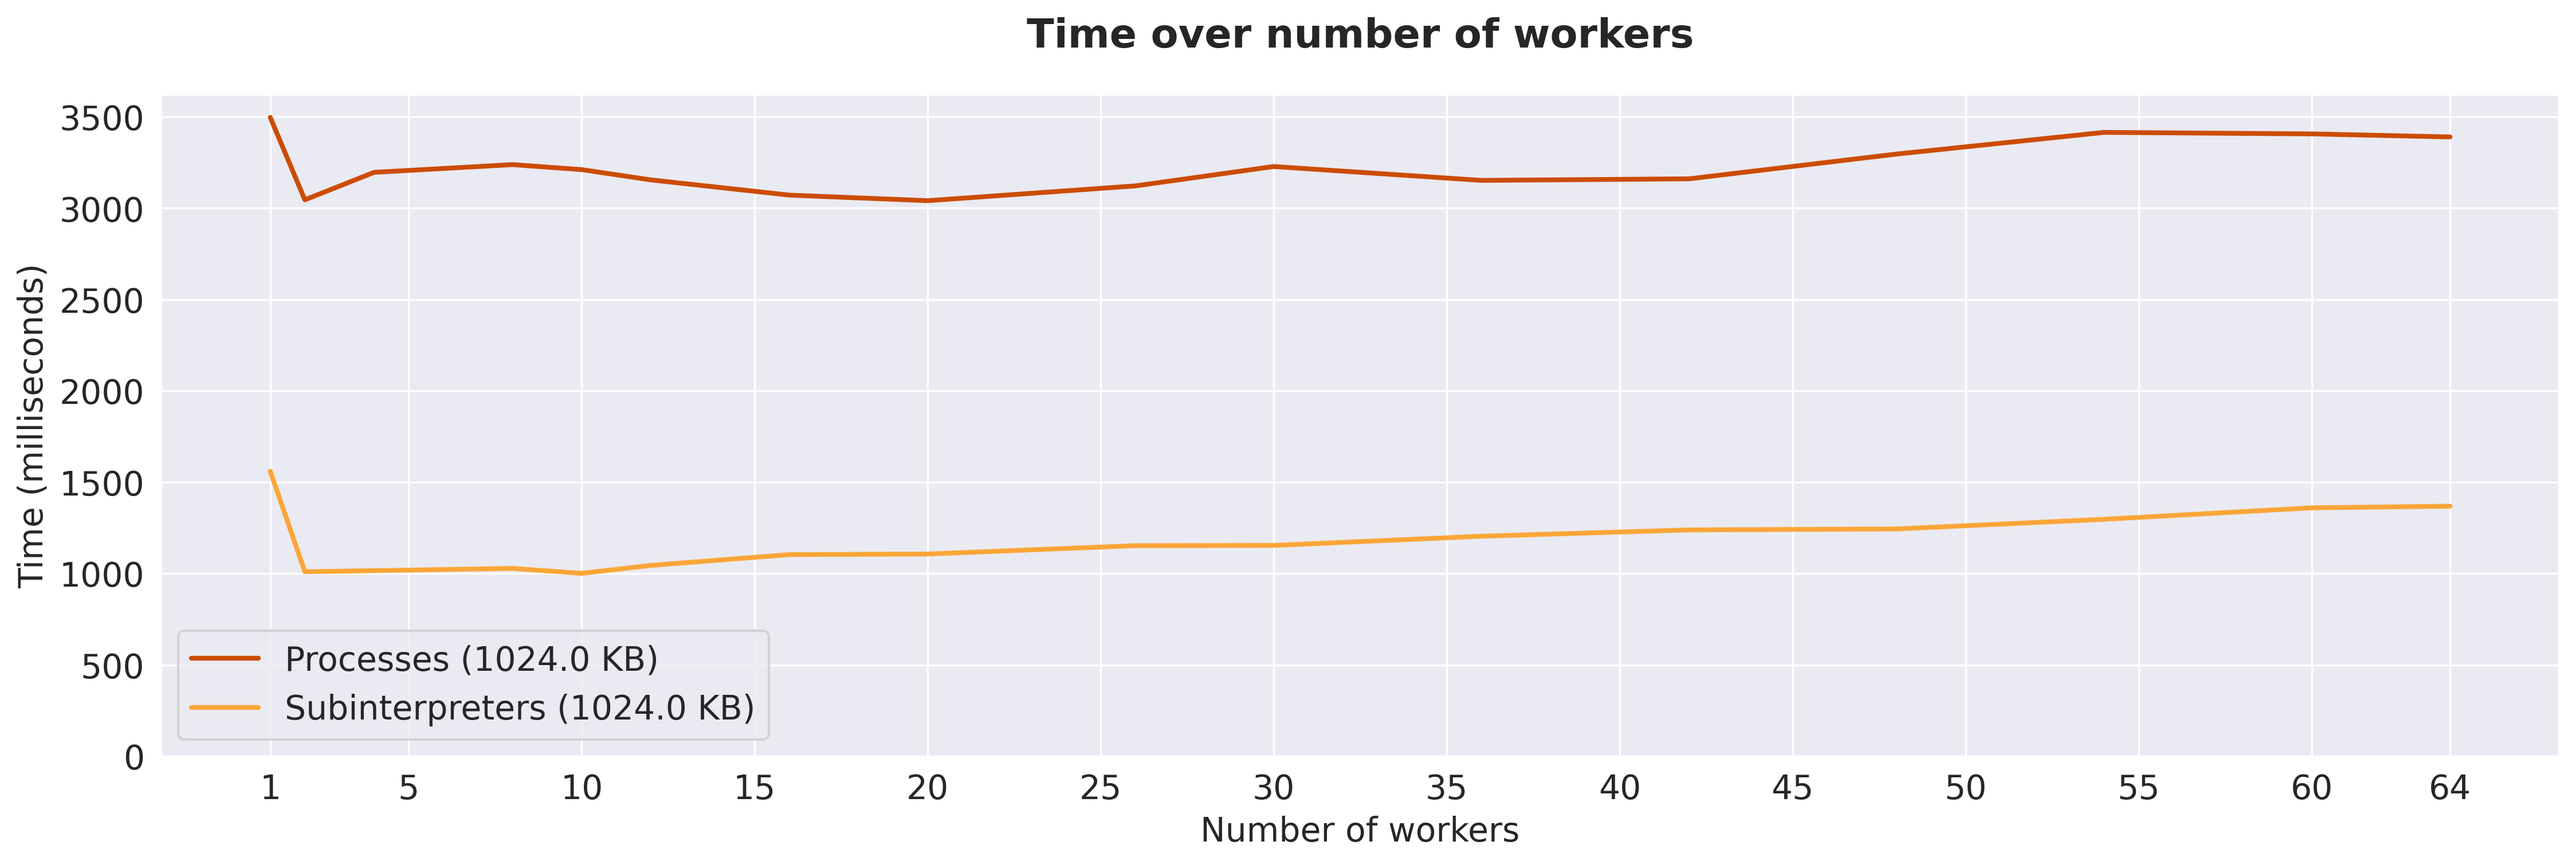

In [12]:
for i in range(len(subinterpreters)):
    fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
    # Setting the number of ticks
    plt.locator_params(axis='x', nbins=len(x_axis)) 
    plt.locator_params(axis='y', nbins=12)
    kb_proc = 0.1 if processes[i][0] == 100 else processes[i][0] / 1024
    kb_sub = 0.1 if subinterpreters[i][0] == 100 else subinterpreters[i][0] / 1024
    plt.plot(x_axis, processes[i][1], '-', label=f"Processes ({kb_proc} KB)", linewidth=linewidth, color=colors[-1])[0].set_dash_capstyle('round')
    plt.plot(x_axis, subinterpreters[i][1], '-', label=f"Subinterpreters ({kb_sub} KB)", linewidth=linewidth, color=colors[-2])[0].set_dash_capstyle('round')
    #plt.plot(x_axis, target, ls="dotted", label="Target", color="black", linewidth=linewidth)

    axs.set_xlabel("Number of workers")
    axs.set_ylabel("Time (milliseconds)")
    axs.set_ylim(ymin=0)#, ymax=8500)
    # Setting the number of ticks
    #axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.xticks(xticks, labels=xticks)
    axs.tick_params(which='minor', length=0)

    plt.title('Time over number of workers', fontweight="bold", y=1.05)
    plt.legend()
    #savefig("stream_service_time")
    plt.show()

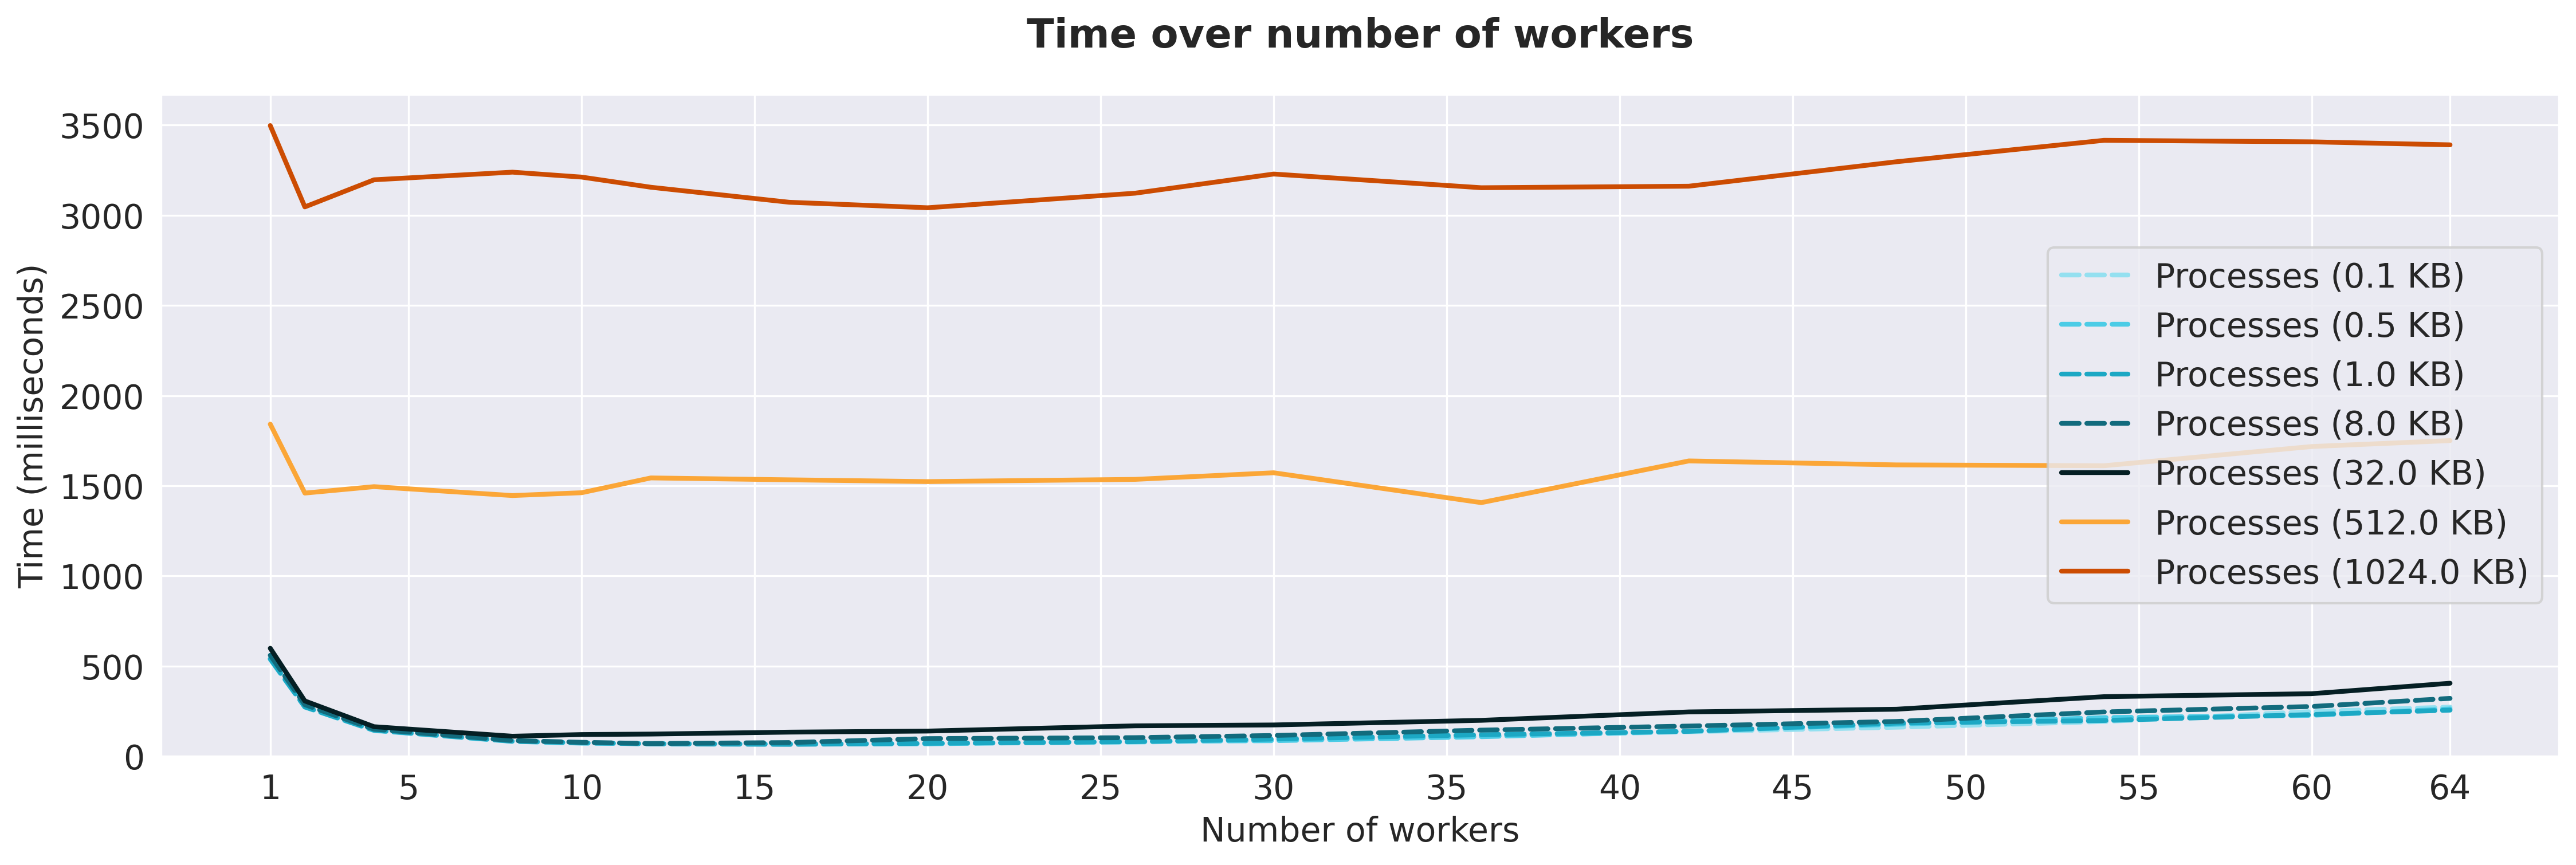

In [13]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis)) 
plt.locator_params(axis='y', nbins=12)
for i in range(len(subinterpreters)):
    kb_proc = 0.1 if processes[i][0] == 100 else processes[i][0] / 1024
    kb_sub = 0.1 if subinterpreters[i][0] == 100 else subinterpreters[i][0] / 1024
    plt.plot(x_axis, processes[i][1], style if kb_sub < 32 else '-', label=f"Processes ({kb_proc} KB)", linewidth=linewidth, color=colors[i])[0].set_dash_capstyle('round')

#plt.plot(x_axis, target, ls="dotted", label="Target", color="black", linewidth=linewidth)
axs.set_xlabel("Number of workers")
axs.set_ylabel("Time (milliseconds)")
axs.set_ylim(ymin=0)#, ymax=8500)
# Setting the number of ticks
#axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(xticks, labels=xticks)
axs.tick_params(which='minor', length=0)

plt.title('Time over number of workers', fontweight="bold", y=1.05)
plt.legend()
#savefig("stream_service_time")
plt.show()

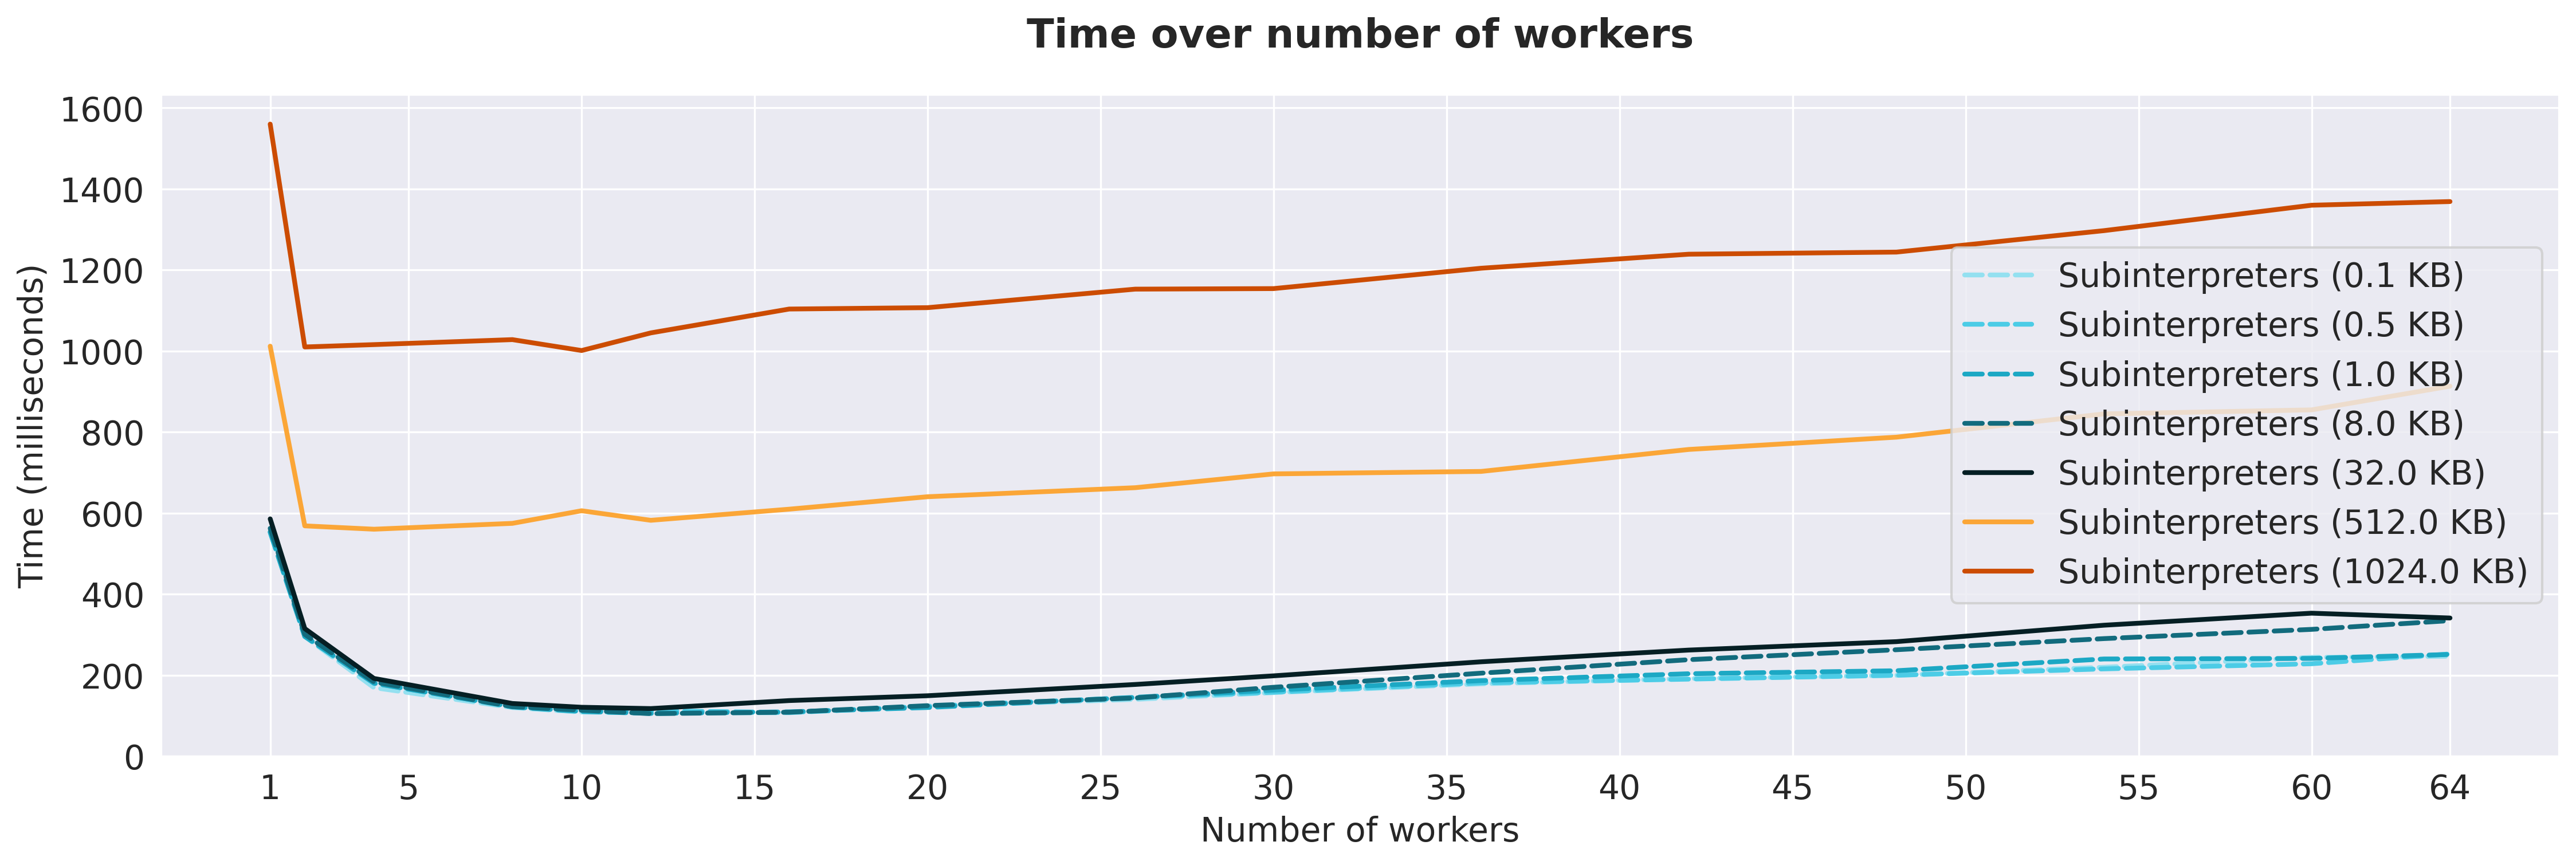

In [14]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis)) 
plt.locator_params(axis='y', nbins=12)
for i in range(len(subinterpreters)):
    kb_proc = 0.1 if processes[i][0] == 100 else processes[i][0] / 1024
    kb_sub = 0.1 if subinterpreters[i][0] == 100 else subinterpreters[i][0] / 1024
    plt.plot(x_axis, subinterpreters[i][1], style if kb_sub < 32 else '-', label=f"Subinterpreters ({kb_sub} KB)", linewidth=linewidth, color=colors[i])[0].set_dash_capstyle('round')

#plt.plot(x_axis, target, ls="dotted", label="Target", color="black", linewidth=linewidth)[0].set_dash_capstyle('round')
axs.set_xlabel("Number of workers")
axs.set_ylabel("Time (milliseconds)")
axs.set_ylim(ymin=0)#, ymax=8500)
# Setting the number of ticks
#axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(xticks, labels=xticks)
axs.tick_params(which='minor', length=0)

plt.title('Time over number of workers', fontweight="bold", y=1.05)
plt.legend()
#savefig("stream_service_time")
plt.show()